## LAB 5
GOAL: Learn about feature selection by modifying the Iris dataset by adding in random variance, then attempting to get rid of the data with the lowest variance.

In [ ]:
# Import the iris dataset from sklearn, as well as the pandas library for data manipulation
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
# Load the iris dataset into two variables
X, y = load_iris(return_X_y = True)
# Turn the iris dataset input values into a dataframe with appropriately named columns
iris_df = pd.DataFrame(X, columns = ["sepal length", "sepal width", "petal length", "petal width"])
# Check the head of the iris dataframe (first 5 values)
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Import the random library in order to generate random numbers
import random

# Create a new list in order to store our random low-variance column
random_data = []
# Loop 150 times to create sufficient data points
for i in range(150):
  # Generate a random number
  new_random_number = random.uniform(65, 65.2)
  # Append it to the end of our list
  random_data.append(new_random_number)

# Turn the list into a dataframe
random_data = pd.DataFrame(random_data)

print(random_data)

             0
0    65.008585
1    65.070682
2    65.061612
3    65.041546
4    65.086055
..         ...
145  65.115178
146  65.003639
147  65.090057
148  65.151988
149  65.041428

[150 rows x 1 columns]


In [ ]:
# Add the random low-variance column into our input dataframe
iris_df["random"] = random_data

print(iris_df)

     sepal length  sepal width  petal length  petal width     random
0             5.1          3.5           1.4          0.2  65.008585
1             4.9          3.0           1.4          0.2  65.070682
2             4.7          3.2           1.3          0.2  65.061612
3             4.6          3.1           1.5          0.2  65.041546
4             5.0          3.6           1.4          0.2  65.086055
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  65.115178
146           6.3          2.5           5.0          1.9  65.003639
147           6.5          3.0           5.2          2.0  65.090057
148           6.2          3.4           5.4          2.3  65.151988
149           5.9          3.0           5.1          1.8  65.041428

[150 rows x 5 columns]


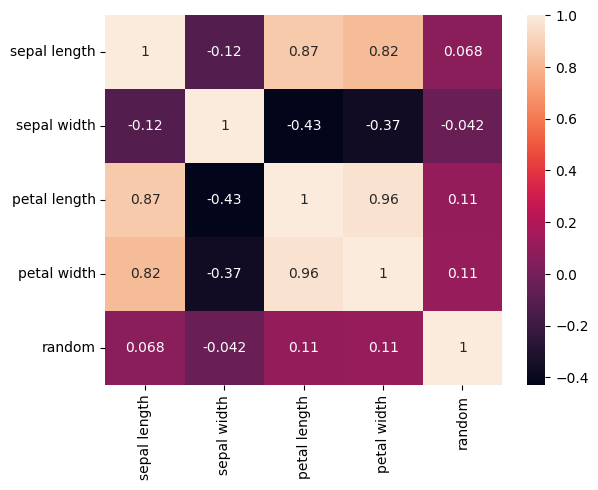

In [ ]:
# Import the seaborn and matplotlib libraries to help visualise our features
import seaborn as sns
import matplotlib.pyplot as plt

# Create a plot of the pairwise correlation values of each feature
plt.figure()
# Get the pairwise correlation values from the dataframe
cor = iris_df.corr()
# Plot the heatmap for these correlation values
sns.heatmap(cor, annot = True)

plt.show()

In [ ]:
# Import the VarianceThreshold tool in order to conduct feature selection
from sklearn.feature_selection import VarianceThreshold
# Filter out everything that does not meet the variance threshold of 0.1
filter = VarianceThreshold(threshold = 0.1)
# Cut out features that do not meet the variance threshold
cleaned_data = filter.fit_transform(iris_df)
# Convert output back into a dataframe
cleaned_data = pd.DataFrame(cleaned_data, columns = ["sepal length", "sepal width", "petal length", "petal width"])

cleaned_data.head()
# NOTE: If we want to retain the column names, we can use the .get_support()
# function.
# Refer to this link: https://stackoverflow.com/questions/39812885/retain-feature-names-after-scikit-feature-selection

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Import chi2 and SelectKBest from sklearn library
from sklearn.feature_selection import chi2, SelectKBest

# Output the results of the chi2 test on our dataframe
print(chi2(iris_df, y))

(array([1.08178209e+01, 3.71072830e+00, 1.16312613e+02, 6.70483602e+01,
       2.18022538e-04]), array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15,
       9.99890995e-01]))


In [ ]:
# Create a SelectKBest filter with the chi2 test and selecting the top 3 features
filter = SelectKBest(chi2, k = 3)
# Filter out our iris dataset with the SelectKBest filter
cleaned_data_2 = filter.fit_transform(iris_df, y)
# Turn our cleaned data output into a dataframe
cleaned_data_2 = pd.DataFrame(cleaned_data_2)

cleaned_data_2.head()

,0,1,2
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
